In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    x = np.cumsum(x[:-1] * dt)
    y = t[1:]
    return [a/b for a,b in zip(x,y)]

def filter_vec(df, name):
    x = df[(df.name == name + ":vector") & (df.type == "vector")] #.filter(["vectime","vecvalue"])
    return x #pd.DataFrame(index=x.vectime.values[0], data={name : x.vecvalue.values[0]})
    
#for i in range(1,len(vec)):
#    row = vec.iloc[i]
#    row = pd.DataFrame(index=row.vectime, data={data_name : row.vecvalue})
#    mean_res = pd.concat((mean_res, row)    
#mean_res = mean_res_dc.groupby(level=0).mean()

## Caso DC - Recursos

In [24]:
# Cargamos los datos
targetDcRes = pd.read_csv("targetDcRes.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetDcRes[targetDcRes.type == "vector"]
proc

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
64,targetDc-0-20240613-16:13:03-18854,vector,SimpleFogNetwork.dc.resourceManager,allocatedVms:vector,NaN,None,NaN,[113.178218007921],[1.0]
67,targetDc-0-20240613-16:13:03-18854,vector,SimpleFogNetwork.dc.resourceManager,allocatedCores:vector,NaN,None,NaN,[113.178218007921],[1.0]
70,targetDc-0-20240613-16:13:03-18854,vector,SimpleFogNetwork.dc.resourceManager,allocatedRam:vector,NaN,None,NaN,[113.178218007921],[2.0]
74,targetDc-0-20240613-16:13:03-18854,vector,SimpleFogNetwork.dc.resourceManager,allocatedDisk:vector,NaN,None,NaN,[113.178218007921],[250.0]


In [19]:
def process_vector(df, data_name: str):
    # Empezamos el proceso de merging del conjunto de datos
    row = df.iloc[0]
    print(type(row.vectime))
    print(type(row.vecvalue))
    
    times = np.append([0], row.vectime)
    times = np.append(times, [3600])
    values = np.append([0], row.vecvalue)
    values = np.append(values, max(row.vecvalue))
    
    vec = pd.DataFrame(index=times, data={data_name : values})
    
    return vec

In [6]:
res_dc = dict()
res_dc["vms"] = process_vector(filter_vec(targetDcRes, "allocatedVms"), "vms")
res_dc["ram"] = process_vector(filter_vec(targetDcRes, "allocatedRam"), "ram")
res_dc["disk"] = process_vector(filter_vec(targetDcRes, "allocatedDisk"), "disk")
res_dc["cpus"] = process_vector(filter_vec(targetDcRes, "allocatedCores"), "cpus")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Gráficas

In [7]:
dc_num_blades = 40
dc_max_vms = dc_num_blades*16
dc_max_ram = dc_num_blades*64
dc_max_disk = dc_num_blades*4000
dc_max_cpus = dc_num_blades*16

In [8]:
def plot_under_curve(axis, x, y ,color):
    axis.plot(x,y, color=color)
    axis.fill_between(x,y.reshape(-1),0, color=color, alpha=.1)

In [15]:
def plot_box(title,axis_title, x, y, color):
    fig, ax = plt.subplots(figsize=(4,3))
    plt.tight_layout()
    plot_under_curve(ax, x, y, color)
    ax.set(ylabel=axis_title)
    ax.set(xlabel='Tiempo de simulación (s)')
    ax.set_ylim(0,100)
    ax.set_xlim(0,3600)
    fig.savefig(title, bbox_inches='tight')

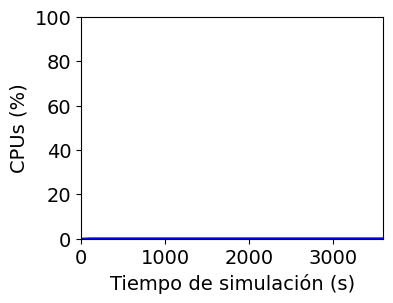

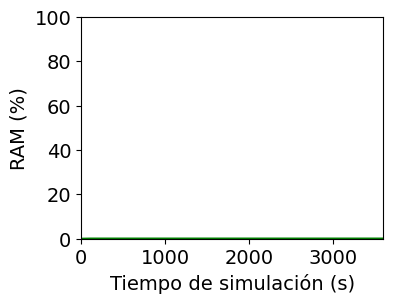

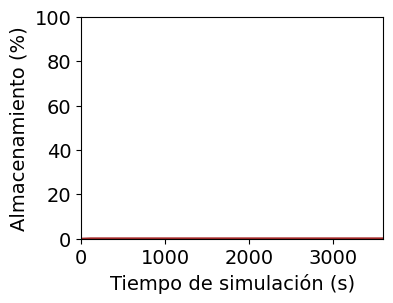

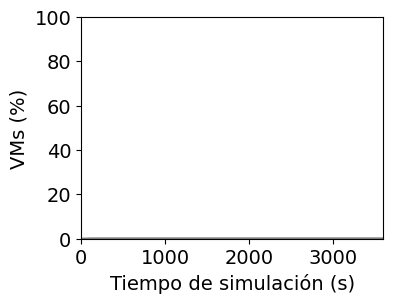

In [29]:
plot_box("smallResDcCpu.pdf", 'CPUs (%)', res_dc["cpus"].index, (res_dc["cpus"].values / dc_max_cpus) * 100, "blue")
plot_box("smallResDcRam.pdf", 'RAM (%)', res_dc["ram"].index, (res_dc["ram"].values / dc_max_ram) * 100, "green")
plot_box("smallResDcDisk.pdf", 'Almacenamiento (%)', res_dc["disk"].index, (res_dc["disk"].values / dc_max_disk) * 100, "brown")
plot_box("smallResDcVms.pdf", 'VMs (%)', res_dc["vms"].index, (res_dc["vms"].values / dc_max_vms) * 100, "gray")

## Caso Fog - Recursos

In [30]:
# Cargamos los datos
targetFogRes = pd.read_csv("targetFogRes.csv",converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

# Sacamos solo los vectores
proc = targetFogRes[targetFogRes.type == "vector"]
proc

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
64,targetFog-0-20240613-16:13:16-18914,vector,SimpleFogNetwork.fg.resourceManager,allocatedVms:vector,NaN,None,NaN,[112.981110385129],[1.0]
67,targetFog-0-20240613-16:13:16-18914,vector,SimpleFogNetwork.fg.resourceManager,allocatedCores:vector,NaN,None,NaN,[112.981110385129],[1.0]
70,targetFog-0-20240613-16:13:16-18914,vector,SimpleFogNetwork.fg.resourceManager,allocatedRam:vector,NaN,None,NaN,[112.981110385129],[2.0]
74,targetFog-0-20240613-16:13:16-18914,vector,SimpleFogNetwork.fg.resourceManager,allocatedDisk:vector,NaN,None,NaN,[112.981110385129],[250.0]


In [31]:
res_fog = dict()
res_fog["vms"] = process_vector(filter_vec(targetFogRes, "allocatedVms"), "vms")
res_fog["ram"] = process_vector(filter_vec(targetFogRes, "allocatedRam"), "ram")
res_fog["disk"] = process_vector(filter_vec(targetFogRes, "allocatedDisk"), "disk")
res_fog["cpus"] = process_vector(filter_vec(targetFogRes, "allocatedCores"), "cpus")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Gráficas

In [32]:
n_fog = 1
fog_max_vms = n_fog * 8
fog_max_ram = n_fog * 16
fog_max_disk = n_fog * 2000
fog_max_cpus = n_fog * 8

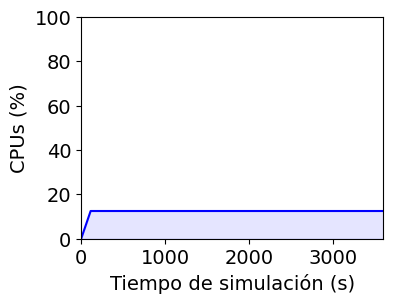

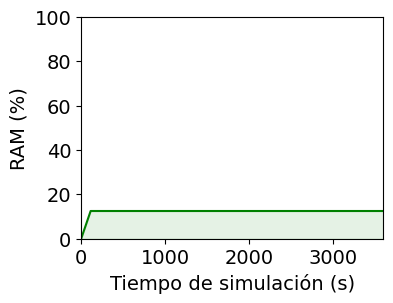

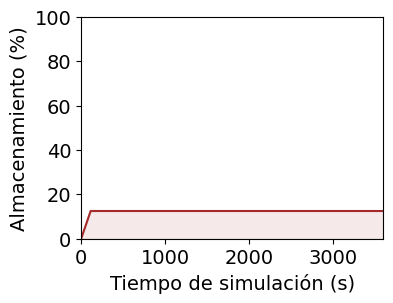

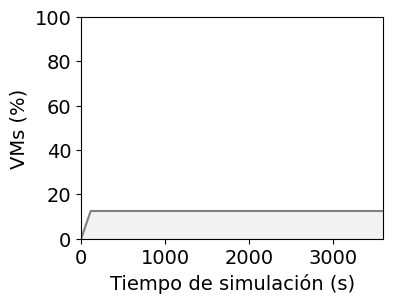

In [33]:
plot_box("smallResFogCpu.pdf", 'CPUs (%)', res_fog["cpus"].index, (res_fog["cpus"].values / fog_max_cpus) * 100, "blue")
plot_box("smallResFogRam.pdf", 'RAM (%)', res_fog["ram"].index, (res_fog["ram"].values / fog_max_ram) * 100, "green")
plot_box("smallResFogDisk.pdf", 'Almacenamiento (%)', res_fog["disk"].index, (res_fog["disk"].values / fog_max_disk) * 100, "brown")
plot_box("smallResFogVms.pdf", 'VMs (%)', res_fog["vms"].index, (res_fog["vms"].values / fog_max_vms) * 100, "gray")